# Convergence Test

In [2]:
using WaveEquation
using Plots
using Printf

## Spatial Resolution Convergence

In [50]:
dt = 0.0001
n = 8000
results = []
xresolutions = [10,20,50,100,200,500]
for xres in xresolutions
    g0(x) = exp(-400*(x-0.7)^2)
    dgdt0(x) = 0.0
    initialstate = [discretize(g0, xres), discretize(dgdt0, xres)];
    result = solve(waveEQ, initialstate, dt, n);
    push!(results, result)
end

Plot the final result:

In [119]:
xs = range(0, 1; length=1001);
plotresult(xs, result, i) = plot(xs, [evaluate(result[i][1], x) for x in xs], 
    label="", 
    lw=2, 
    xlabel="x", 
    ylabel="A", 
    title=@sprintf("t = %.2f",(i-1)*dt),
    ylim=[-1,1]
)

plotresult (generic function with 1 method)

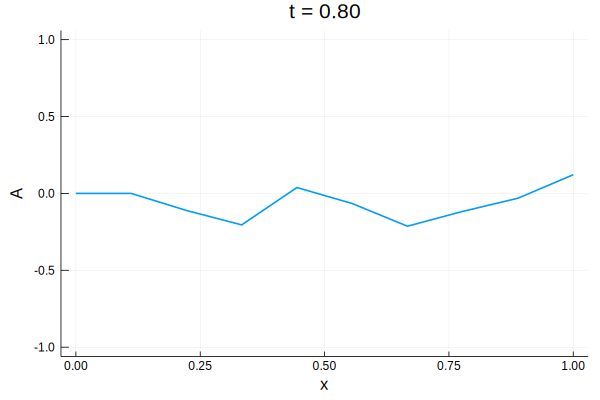

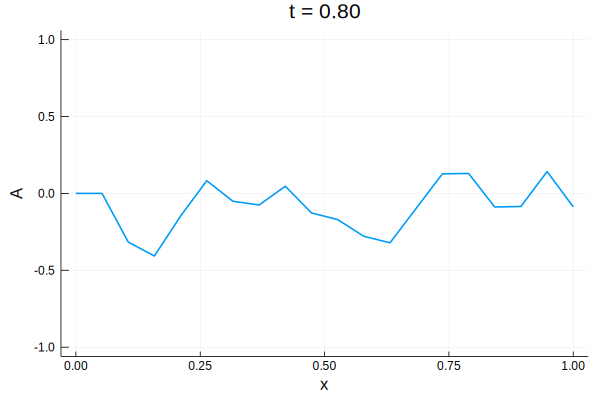

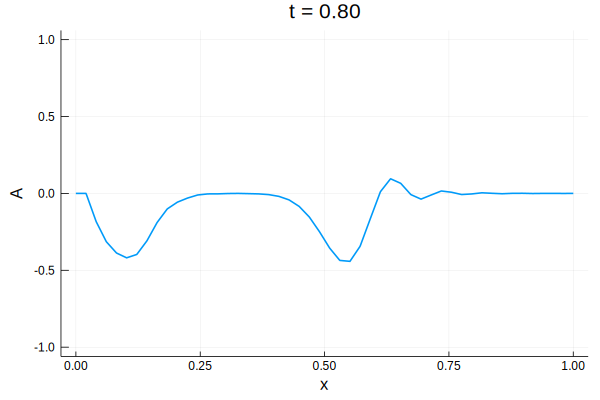

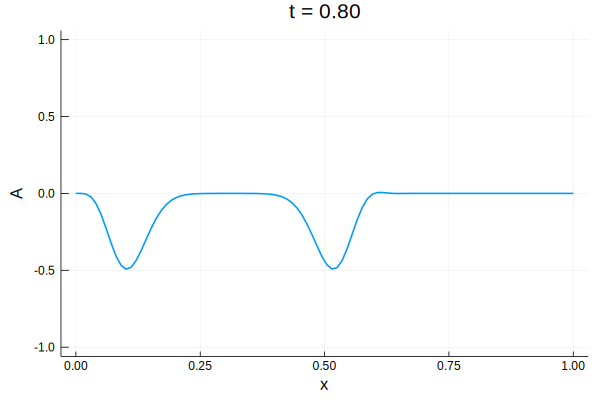

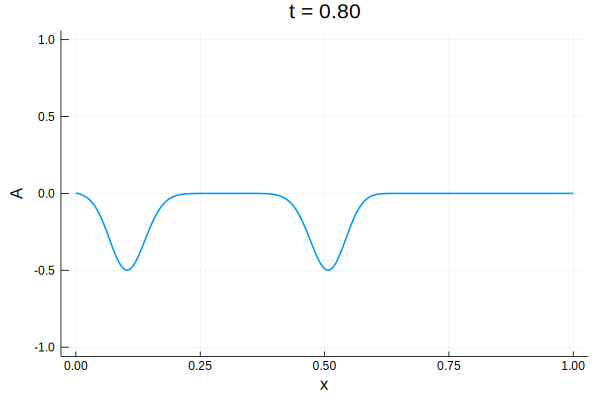

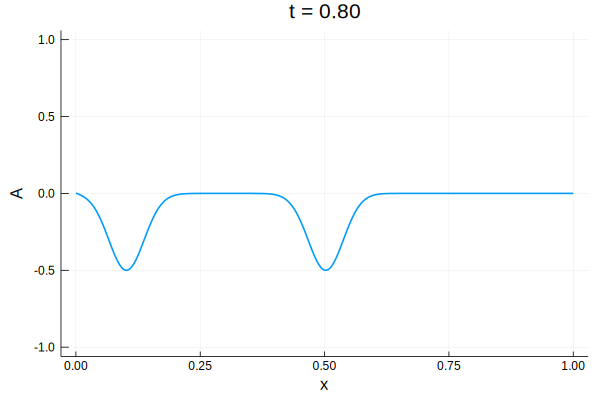

In [120]:
for j in 1:length(xresolutions)
    display(plotresult(xs, results[j], n))
end

Plot energy over time to show that it converges

In [53]:
total_energies = []
for j in 1:length(xresolutions)
    potential_energy = [quad_integrate(ddx(results[j][i][1])^2) for i in 1:n+1];
    kinetic_energy = [quad_integrate(results[j][i][2]^2) for i in 1:n+1];
    total_energy = potential_energy+kinetic_energy
    push!(total_energies, total_energy)
end

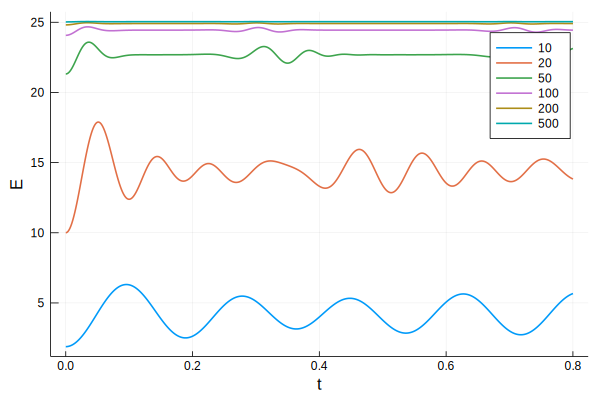

In [55]:
plot(dt*(1:n+1), total_energies, xlabel="t", ylabel="E", lab=transpose(xresolutions), lw=2)

## Time Resolution Convergence

Note that in this case the solution diverges with dt > 0.0007

In [148]:
T = 0.8
xres = 500
time_results = []
dts = [0.0006, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001, 0.00001]
for dt in dts
    n = Int(round(T / dt))
    g0(x) = exp(-400*(x-0.7)^2)
    dgdt0(x) = 0.0
    initialstate = [discretize(g0, xres), discretize(dgdt0, xres)];
    result = solve(waveEQ, initialstate, dt, n);
    push!(time_results, result)
end

In [149]:
time_total_energies = []
ns = []
for j in 1:length(dts)
    nplus1 = length(time_results[j])
    potential_energy = [quad_integrate(ddx(time_results[j][i][1])^2) for i in 1:nplus1];
    kinetic_energy = [quad_integrate(time_results[j][i][2]^2) for i in 1:nplus1];
    total_energy = potential_energy+kinetic_energy
    push!(time_total_energies, total_energy)
    push!(ns, 1:nplus1)
end

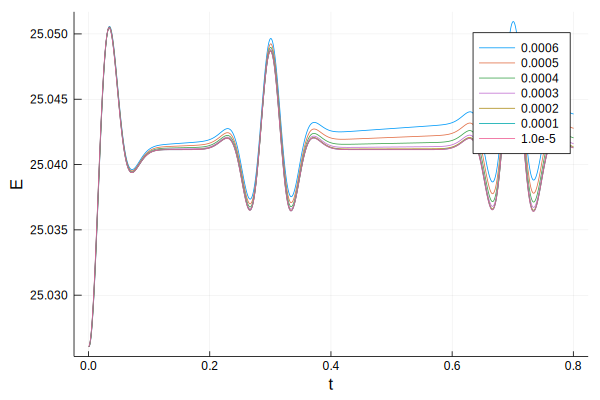

In [150]:
plot(dts.*ns, time_total_energies, xlabel="t", ylabel="E", lab=transpose(dts), lw=1)

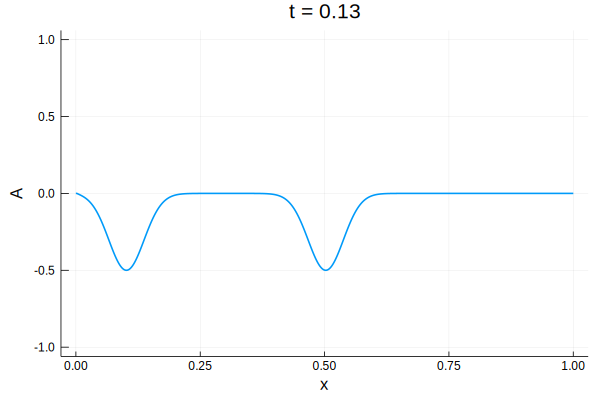

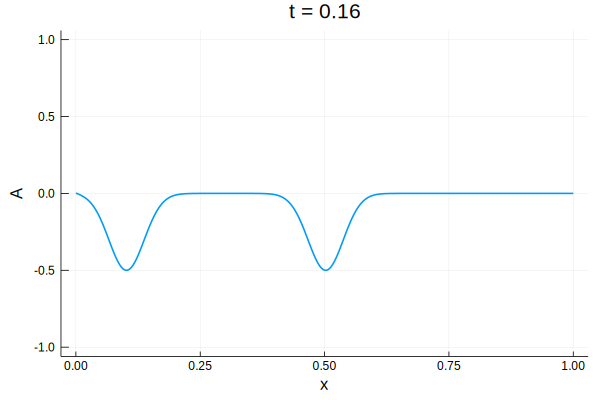

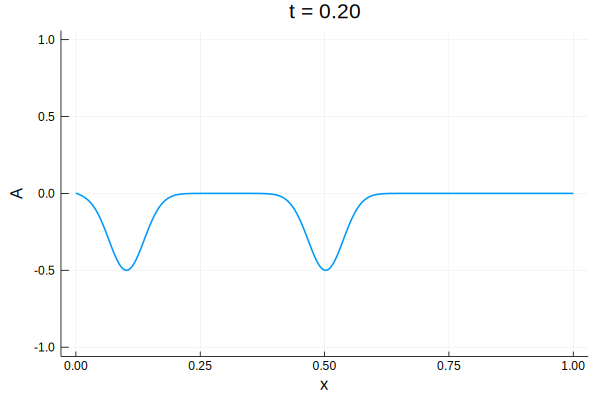

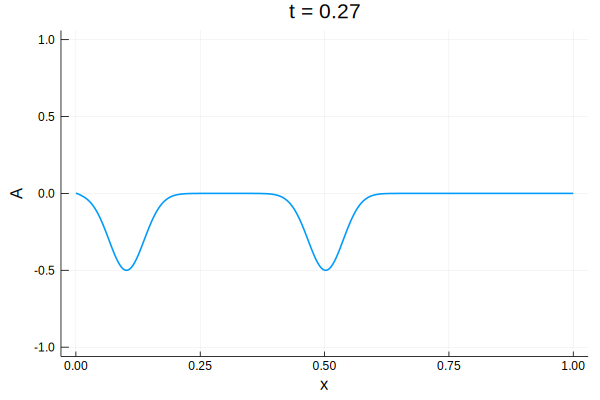

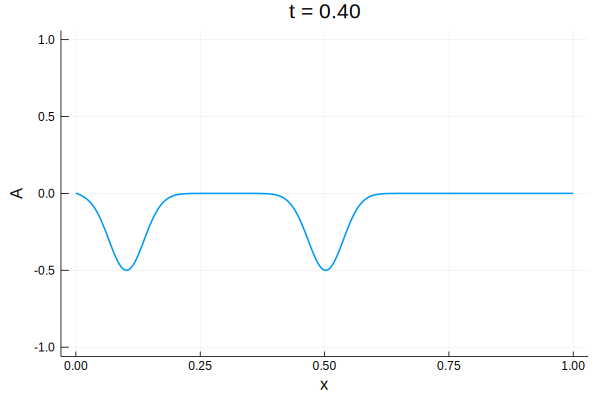

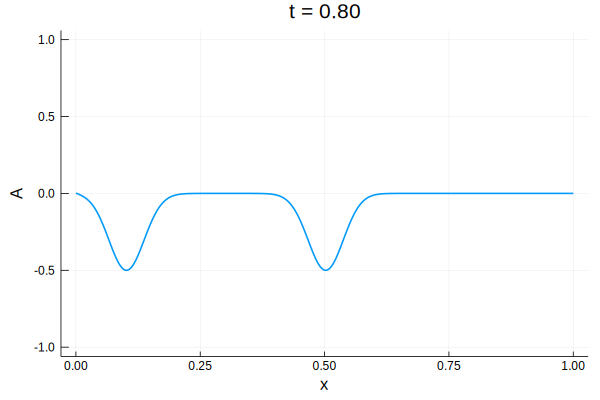

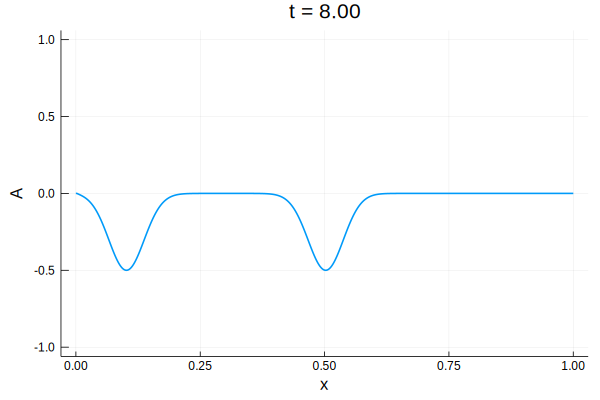

In [151]:
for j in 1:length(dts)
    display(plotresult(xs, time_results[j], ns[j].stop))
end